In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/mail_data.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
mail_data = df.where((pd.notnull(df)),'')

In [6]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_fi

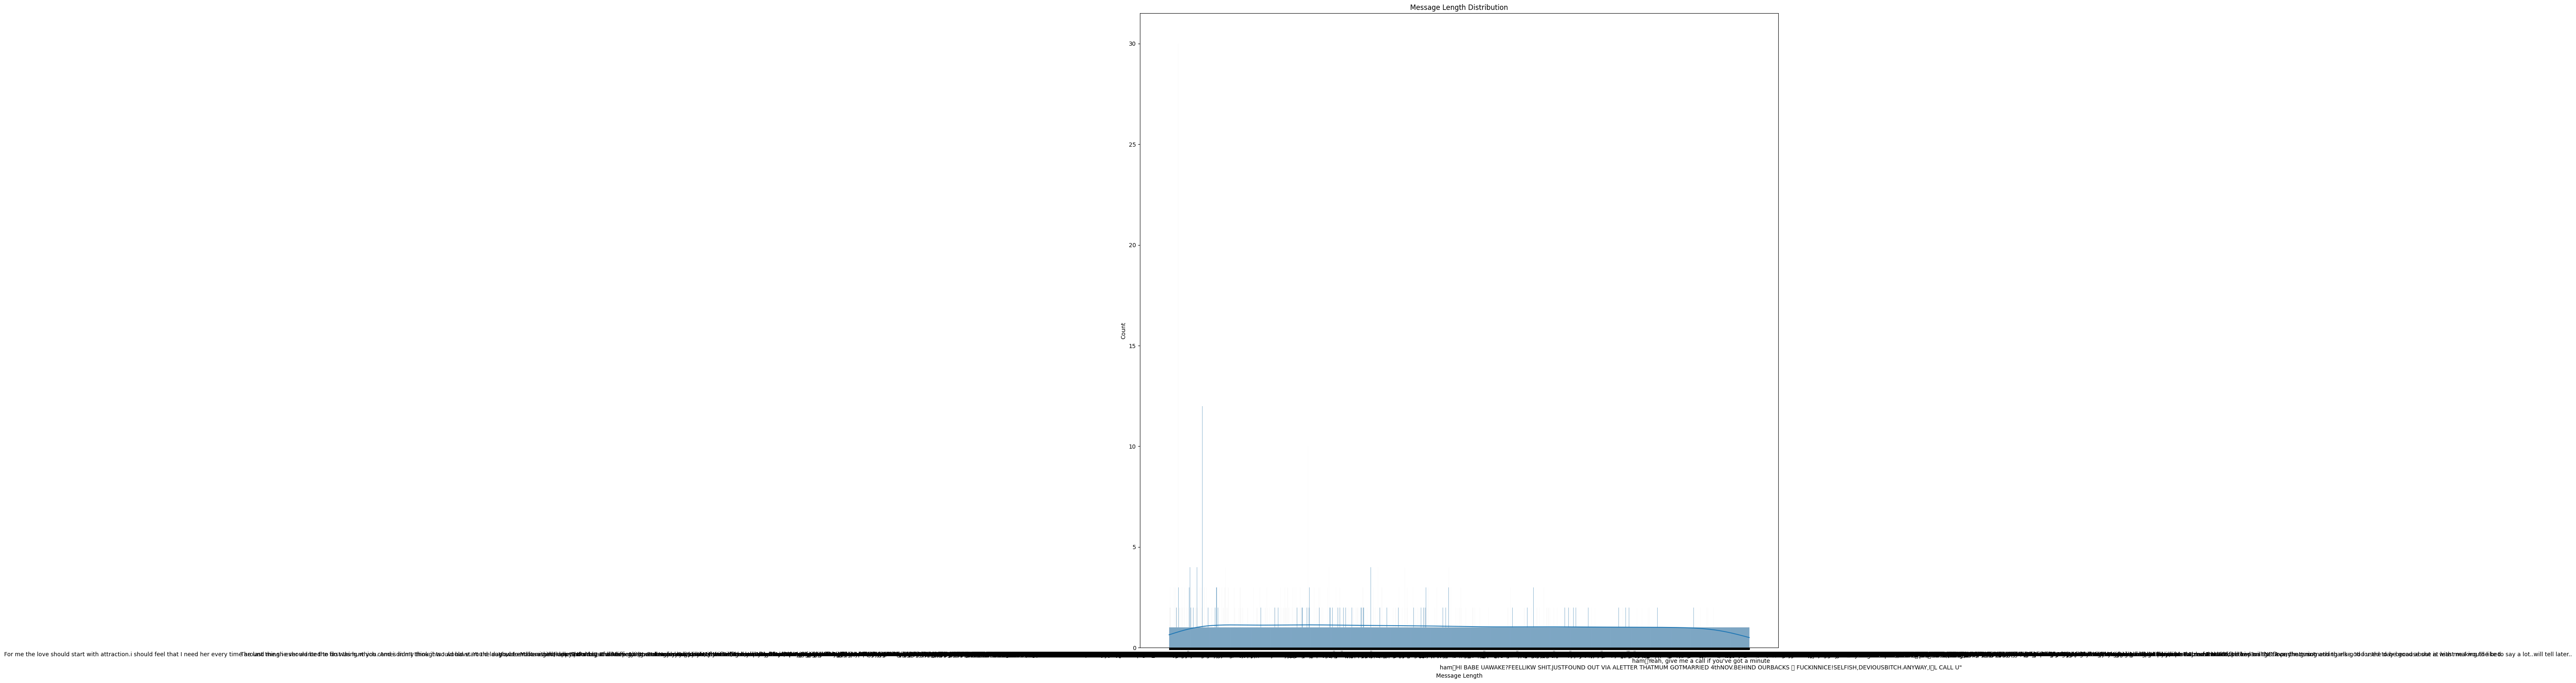

In [12]:
plt.figure(figsize=(20, 20))
sns.histplot(df['Message'], kde=True)
plt.xlabel('Message Length')
plt.title('Message Length Distribution')
plt.show()

In [13]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [14]:
mail_data.shape

(5572, 2)

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

tokenize

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
df['Message'] = df['Message'].apply(lambda x: word_tokenize(x))

In [18]:
df['Message']

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

lowercase

In [19]:
df['Message'] = df['Message'].apply(lambda tokens: [token.lower() for token in tokens])


In [20]:
df['Message']

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568      [will, ü, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

removing the punctuation

In [21]:

import string

def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

df['Message'] = df['Message'].apply(remove_punctuation)


In [22]:
df['Message']

0       [go, until, jurong, point, crazy, .., availabl...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, he...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, ..., any,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

stopwords

In [23]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df['Message'] = df['Message'].apply(remove_stopwords)


In [24]:
df['Message']

0       [go, jurong, point, crazy, .., available, bugi...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3       [u, dun, say, early, hor, ..., u, c, already, ...
4       [nah, n't, think, goes, usf, lives, around, th...
                              ...                        
5567    [2nd, time, tried, 2, contact, u., u, £750, po...
5568                   [ü, b, going, esplanade, fr, home]
5569                       [pity, mood, ..., suggestions]
5570    [guy, bitching, acted, like, 'd, interested, b...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [25]:
df['Message'] = df['Message'].apply(lambda tokens: ' '.join(tokens))


In [26]:
df['Message']

0       go jurong point crazy .. available bugis n gre...
1                         ok lar ... joking wif u oni ...
2       free entry 2 wkly comp win fa cup final tkts 2...
3             u dun say early hor ... u c already say ...
4              nah n't think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u. u £750 pound prize...
5568                          ü b going esplanade fr home
5569                            pity mood ... suggestions
5570    guy bitching acted like 'd interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [27]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [29]:
X = mail_data['Message']

Y = mail_data['Category']

<Axes: xlabel='Category', ylabel='count'>

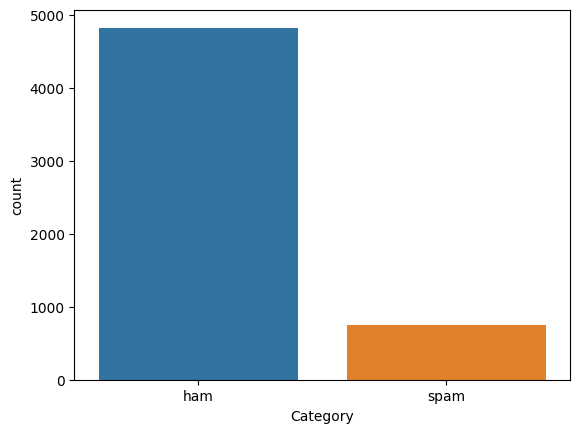

In [30]:
import seaborn as sns
sns.countplot(data=df,x="Category")

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
 print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:

# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [37]:

X_test_features

<1115x7431 sparse matrix of type '<class 'numpy.float64'>'
	with 7687 stored elements in Compressed Sparse Row format>

In [38]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [43]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [44]:
print('Accuracy on training data : ', accuracy_on_training_data)


Accuracy on training data :  0.9670181736594121


In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_train, prediction_on_training_data)
print(cm)

[[ 449  143]
 [   4 3861]]


smote

In [46]:
print("Before Over Sampling, count of the label '1': {}".format(sum(Y_train == 1)))
print("Before Over Sampling, count of the label '0': {} \n".format(sum(Y_train == 0)))
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
# sm1 = SMOTE(random_state = 2)
X_train_res, y_train_res = oversample.fit_resample(X_train_features, Y_train)
X_test_res, y_test_res = oversample.fit_resample(X_test_features, Y_test)
print('After Over Sampling, the shape of the train_X: {}'.format(X_train_res.shape))
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))
print('After Over Sampling, the shape of the test_X: {}'.format(X_test_res.shape))
print('After Over Sampling, the shape of the test_y: {} \n'.format(y_test_res.shape))
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))

Before Over Sampling, count of the label '1': 3865
Before Over Sampling, count of the label '0': 592 

After Over Sampling, the shape of the train_X: (7730, 7431)
After Over Sampling, the shape of the train_y: (7730,) 

After Over Sampling, the shape of the test_X: (1920, 7431)
After Over Sampling, the shape of the test_y: (1920,) 

After Over Sampling, count of the label '1': 3865
After Over Sampling, count of the label '0': 3865


In [48]:
from sklearn.metrics import classification_report


In [49]:
lrr = LogisticRegression()
lrr.fit(X_train_res, y_train_res)
predictions = lrr.predict(X_test_res)
# print classifications report
print(classification_report(y_test_res,predictions ))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       960
           1       0.94      1.00      0.97       960

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.97      0.97      0.97      1920



In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_res,predictions)
print(cm)

[[904  56]
 [  2 958]]


In [51]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
# input_mail = ["	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

predictions = lrr.predict(input_data_features)
print(predictions)


if (predictions[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [52]:
# input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail = ["	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

predictions = lrr.predict(input_data_features)
print(predictions)


if (predictions[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
